# Simulasi Numerik

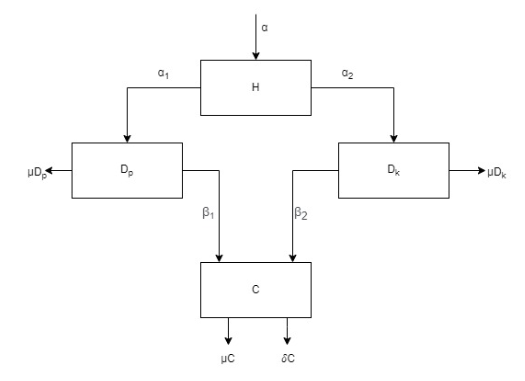

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import ipywidgets as ipw
pd.reset_option("all")

<ipython-input-2-10bc30d8e444>:6: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option("all")
<ipython-input-2-10bc30d8e444>:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option("all")
<ipython-input-2-10bc30d8e444>:6: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option("all")


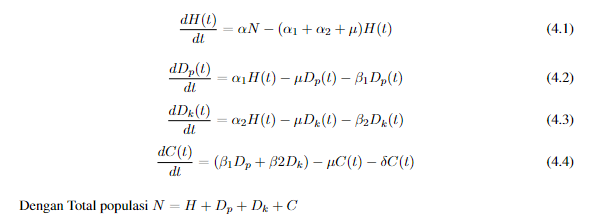

In [3]:
def diabetes(X, t, N, alfa, alfa1, alfa2, beta1, beta2, mu, delta):

  P, Dp, Dk, C = X
  Pdot = alfa*N - (alfa1 + alfa2 + mu) * P
  Dpdot = alfa1 * P - mu * Dp - beta1 * Dp
  Dkdot = alfa2 * P - mu * Dk - beta2 * Dk
  Cdot = (beta1 * Dp + beta2 * Dk) - mu * C - delta * C
  return np.array([Pdot,Dpdot,Dkdot,Cdot])

In [4]:
def RungeKuttaOrde4(odesystem, X0, t, N, alfa, alfa1, alfa2, beta1, beta2, mu, delta):
  dt = t[1]-t[0]
  gridt = len(t)
  X = np.zeros([gridt,len(X0)])
  X[0] = X0
  for i in range(gridt-1):
    k1 = odesystem(X[i], t[i], N, alfa, alfa1, alfa2, beta1, beta2, mu, delta)
    k2 = odesystem(X[i] + dt/2. * k1, t[i] + dt/2., N, alfa, alfa1, alfa2, beta1, beta2, mu, delta)
    k3 = odesystem(X[i] + dt/2. * k2, t[i] + dt/2., N, alfa, alfa1, alfa2, beta1, beta2, mu, delta)
    k4 = odesystem(X[i] + dt    * k3, t[i] + dt, N, alfa, alfa1, alfa2, beta1, beta2, mu, delta)
    X[i+1] = X[i] + dt/6. * (k1 + 2. * k2 + 2. * k3 + k4)
  return X

In [5]:
def adam(odesystem, X0, t, N, alfa, alfa1, alfa2, beta1, beta2, mu, delta):
  RK = RungeKuttaOrde4(odesystem, X0, t, N, alfa, alfa1, alfa2, beta1, beta2, mu, delta)
  dt = t[1]-t[0]
  gridt = len(t)
  X = RK
  print(X)
  for i in range(gridt-5):
    Fn0 = odesystem(X[i], t[i], N, alfa, alfa1, alfa2, beta1, beta2, mu, delta)
    Fn1 = odesystem(X[i+1], t[i+1], N, alfa, alfa1, alfa2, beta1, beta2, mu, delta)
    Fn2 = odesystem(X[i+2], t[i+2], N, alfa, alfa1, alfa2, beta1, beta2, mu, delta)
    Fn3 = odesystem(X[i+3], t[i+3], N, alfa, alfa1, alfa2, beta1, beta2, mu, delta)

    # adam predictor
    X[i+4] = X[i+3] + dt/24.0 * (55. * Fn3 - 59. * Fn2 + 37. * Fn1 - 9. * Fn0)

    # adam corrector
    Fn = odesystem(X[i+4], t[i+4], N, alfa, alfa1, alfa2, beta1, beta2, mu, delta)
    X[i+4] = X[i+3] + dt/24.0 * (9. * Fn + 19. * Fn3 - 5. * Fn2 + Fn1)
  return X

In [6]:
N = 214.1*10**6
alfa = 0.001
alfa1 = 0.2
alfa2 = 0.1
beta1 = 0.08
beta2 = 0.08
mu = 0.02
delta = 0.001

# nilai awal
P0 = 124758 * 10 **3
Dp0 = 0.9*(5654 * 10**3)
Dk0 = 0.1*(5654 * 10**3)
C0 = 0.443 * (5654 * 10**3)

Nt = 51
tmax = 2
t = np.linspace(0., tmax, Nt)
#nilai awal
X0 = [P0, Dp0, Dk0, C0]

In [7]:
Solusi = RungeKuttaOrde4(diabetes, X0, t, N, alfa, alfa1, alfa2, beta1, beta2, mu, delta)
Solusi3 = adam(diabetes, X0, t, N, alfa, alfa1, alfa2, beta1, beta2, mu, delta)

[[1.24758000e+08 5.08860000e+06 5.65400000e+05 2.50472200e+06]
 [1.23179784e+08 6.05803889e+06 1.05801923e+06 2.52304937e+06]
 [1.21621640e+08 7.01108761e+06 1.54241185e+06 2.54599850e+06]
 [1.20083313e+08 7.94797082e+06 2.01869030e+06 2.57348732e+06]
 [1.18564552e+08 8.86891028e+06 2.48696559e+06 2.60543488e+06]
 [1.17065106e+08 9.77412484e+06 2.94734727e+06 2.64176137e+06]
 [1.15584732e+08 1.06638305e+07 3.39994347e+06 2.68238809e+06]
 [1.14123185e+08 1.15382405e+07 3.84486091e+06 2.72723743e+06]
 [1.12680227e+08 1.23975652e+07 4.28220494e+06 2.77623285e+06]
 [1.11255621e+08 1.32420124e+07 4.71207952e+06 2.82929891e+06]
 [1.09849133e+08 1.40717869e+07 5.13458725e+06 2.88636119e+06]
 [1.08460535e+08 1.48870912e+07 5.54982942e+06 2.94734633e+06]
 [1.07089596e+08 1.56881249e+07 5.95790599e+06 3.01218200e+06]
 [1.05736094e+08 1.64750850e+07 6.35891562e+06 3.08079686e+06]
 [1.04399807e+08 1.72481661e+07 6.75295567e+06 3.15312059e+06]
 [1.03080515e+08 1.80075602e+07 7.14012225e+06 3.229083

In [8]:
pd.options.display.float_format = '{:.5f}'.format
df = pd.DataFrame(Solusi[:,2], columns=['C Runge Kutta'])
df.insert(1,'C Adam',Solusi3[:,2])
df2 = abs(df['C Runge Kutta']-df['C Adam'])
df.insert(2, 'Selisih', df2 )
df

,C Runge Kutta,C Adam,Selisih
0,565400.00000,565400.00000,0.00000
1,1058019.23402,1058019.23402,0.00000
2,1542411.84752,1542411.84752,0.00000
3,2018690.29962,2018690.29962,0.00000
4,2486965.58788,2486965.58856,0.00068
5,2947347.26703,2947347.26837,0.00134
6,3399943.46743,3399943.46941,0.00198
7,3844860.91330,3844860.91591,0.00261
8,4282204.94073,4282204.94395,0.00322
9,4712079.51548,4712079.51929,0.00382


In [9]:
Total = df['Selisih'].sum()
print(Total/50)

0.010075269415974617


<function matplotlib.pyplot.show(close=None, block=None)>

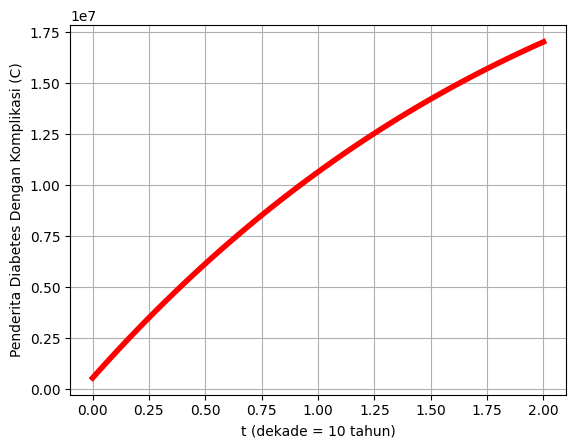

In [11]:
plt.figure()
# plt.title("Metode Runge Kutta C")
# plt.title("Metode Adam Bashforth Moulton C")
plt.plot(t, Solusi[:,2], 'r', label = 'H',linewidth=4)
# plt.plot(t, Solusi3[:,2], 'b-.', label = 'C',linewidth=4)
plt.yscale('linear')
plt.grid()
plt.xlabel("t (dekade = 10 tahun)")
plt.ylabel("Penderita Diabetes Dengan Komplikasi (C)")
# plt.legend(loc = "best")
# plt.ticklabel_format(style='plain')
# plt.savefig('RKC.jpg')
# plt.savefig('adamC.jpg')
plt.show

# Estimasi Parameter

In [ ]:
from math import *
import numpy as np

import scipy.stats as stats
import copy

In [ ]:
def diabetes(ini, time_step, N, params):

  Y = np.zeros(4)
  X = ini
  alfa = 0.001
  # N = X[0]+X[1]+X[2]+X[3]
  mu = 0.00001
  alfa1 = 0.002
  alfa2 = 0.001
  delta = 0.001
  beta1 = params[0]
  beta2 = params[1]
  #delta = params[2]

  Y[0] = alfa * N - (alfa1 + alfa2 + mu) * X[0]
  Y[1] = alfa1 * X[0] - mu * X[1] - beta1 * X[1]
  Y[2] = alfa2 * X[0] - mu * X[2] - beta2 * X[2]
  Y[3] = (beta1 * X[1] + beta2 * X[2]) - mu * X[3] - delta * X[3]

  return Y

In [ ]:

times = [2000, 2011, 2021]
data = [2504855, 3230312, 8623039]


params = [0.009, 0.01]
paramnames = ['beta1', 'beta2']

In [ ]:
def x0fcn(params, data):
  N = 214.1*10**6
  Dp0 = 0.9*(5654.3 * 10**3)
  Dk0 = 0.1*(5654.3 * 10**3)
  C0 = data[0]
  H0 = N - Dp0 - Dk0 - C0

  X0 = [H0, Dp0, Dk0, C0]
  return X0

In [ ]:
ini = x0fcn(params,data)
print(ini)


[205940845.0, 5088870.0, 565430.0, 2504855]


In [ ]:
def yfcn(res, params):
  return res[:,3]

In [ ]:
from scipy.integrate import odeint as ode # ode solver
#### Simulate the model ####
N = 214.1*10**6
res = ode(diabetes, ini, times, args=(N,params))
print(res)

[[2.05940845e+08 5.08887000e+06 5.65430000e+05 2.50485500e+06]
 [2.01550330e+08 8.87512432e+06 2.62814904e+06 3.34618155e+06]
 [1.97683158e+08 1.19274634e+07 4.27692167e+06 4.59216184e+06]]


In [ ]:
sim_measure = yfcn(res, params)
print(sim_measure)

[2504855.         3346181.54519451 4592161.83700388]


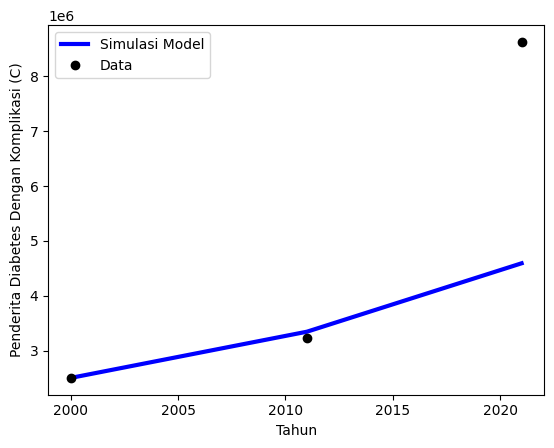

In [ ]:
import matplotlib.pyplot as plt # nice plotting commands, very similar to Matlab commands
plt.plot(times, sim_measure, 'b-', linewidth=3, label='Simulasi Model')
plt.plot(times, data, 'ko', linewidth=2, label='Data')
plt.xlabel('Tahun')
plt.ylabel('Penderita Diabetes Dengan Komplikasi (C)')
# plt.ticklabel_format(style='plain')
plt.legend()
plt.savefig('Simulasi1.jpg')
plt.show()

In [ ]:
from scipy.stats import poisson
from scipy.stats import norm
def NLL(params, data, times):

  params = np.abs(params)
  data = np.array(data)

  N = 214.1*10**6
  res = ode(diabetes, x0fcn(params,data), times, args=(N,params))


  y = yfcn(res, params)


  #nll = sum(y) - sum(data*np.log(y))
  nll=sum((data-y)**2)


  return nll

In [ ]:
import scipy.optimize as optimize
optimizer = optimize.minimize(NLL, params, args=(data, times), method='Nelder-Mead')
paramests = np.abs(optimizer.x)
print(paramests)


[0.01951321 0.05978629]


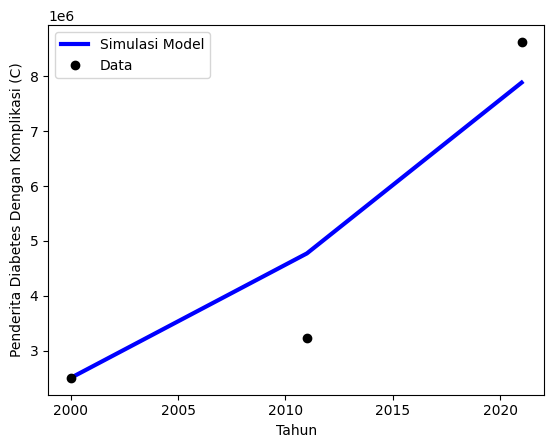

In [ ]:
iniests = x0fcn(paramests, data)


xest = ode(diabetes, iniests, times, args=(N,paramests))
est_measure = yfcn(xest, paramests)

plt.plot(times, est_measure, 'b-', linewidth=3, label='Simulasi Model')
plt.plot(times, data, 'ko', linewidth=2, label='Data')
plt.xlabel('Tahun')
plt.ylabel('Penderita Diabetes Dengan Komplikasi (C)')
# plt.ticklabel_format(style='plain')
plt.savefig('Simulasi2.jpg')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(data,est_measure)

0.18770090531258635